In [22]:
import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

# Движемся по pipline

## Препроцессинг + создание фичей

### Обработка пропусков

### Шкалирование фичей

**Standart scaling**

$$z = \frac{x - \mu}{\sigma}$$

- smooths outliers
- always used in distance-based algorithms

In [18]:
from sklearn.preprocessing import StandardScaler 

data = np.array([1, 1, 0, -1, 2, 1, 2, 3, -2, 4, 100]).reshape(-1, 1).astype(np.float64)

StandardScaler().fit_transform(data)

array([[-0.31922662],
       [-0.31922662],
       [-0.35434155],
       [-0.38945648],
       [-0.28411169],
       [-0.31922662],
       [-0.28411169],
       [-0.24899676],
       [-0.42457141],
       [-0.21388184],
       [ 3.15715128]])

**Min-Max scaling** - rescaling feature to [0,1] scale.

$$z=\frac{x-x_{min}}{x_{max}-x_{min}}$$
Appropriate when we need features in a limited range.

In [19]:
from sklearn.preprocessing import MinMaxScaler

MinMaxScaler().fit_transform(data)

array([[0.02941176],
       [0.02941176],
       [0.01960784],
       [0.00980392],
       [0.03921569],
       [0.02941176],
       [0.03921569],
       [0.04901961],
       [0.        ],
       [0.05882353],
       [1.        ]])

### Нелинейные перобразования

**Rescaling to normal distribution** - for lognorm features or for features with heavy right tail.

$$z = log(x)$$
Commonly used with salary, population and etc.

In [23]:
from scipy.stats import lognorm

data = lognorm(s=1).rvs(500)

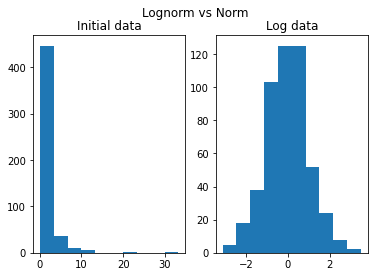

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Lognorm vs Norm')
ax1.hist(data)
ax1.set_title('Initial data')
ax2.hist(np.log(data))
ax2.set_title('Log data')
plt.show()

**Polynomail features** - create from features $x_1, x_2, \dots$ polynomial of a certain degree: $x_1^2, x_2^2, x_1x_2 \dots$.

Commonly used if linear models give bad results.

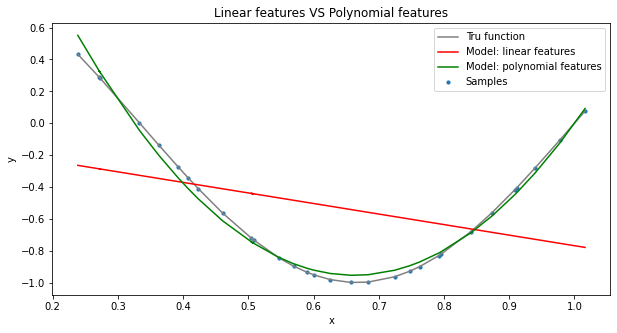

In [26]:
import math
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from matplotlib import pyplot as plt
%matplotlib inline

x = np.linspace(0.25,1, num=30) + np.random.normal(0, 0.01, 30)
y = np.cos(1.5 * math.pi * x)

x = x[:, np.newaxis]
y = y[:, np.newaxis]


# without polynomial features
skm = LinearRegression()
skm.fit(x, y)
y_pred = skm.predict(x)

# with polynomial features
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

skm2 = LinearRegression()
skm2.fit(x_poly, y)
y_poly_pred = skm2.predict(x_poly)

plt.figure(figsize=(10,5))
plt.scatter(x,y,s=10, label='Samples')
plt.plot(x, y, color='gray', label='Tru function')
plt.plot(x, y_pred, color='r', label='Model: linear features')
plt.plot(x, y_poly_pred, color='g', label='Model: polynomial features')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Linear features VS Polynomial features')
plt.show;

### Бинаризация

Divide the values of the feature into bins and add for each bin a new sign-indicator of getting into this bin.

Can help the linear model look for non-linear dependencies.

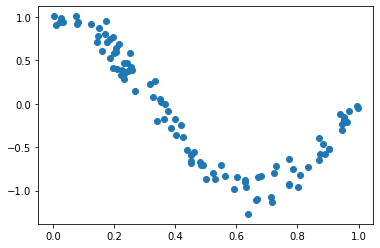

In [27]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

np.random.seed(36)
X = np.random.uniform(0, 1, size=100)
y = np.cos(1.5 * np.pi * X) + np.random.normal(scale=0.1, size=X.shape)

plt.scatter(X, y);

In [28]:
X = X.reshape((-1, 1))

thresholds = np.arange(0.2, 1.1, 0.2).reshape((1, -1))

X_expand = np.hstack((X, ((X > thresholds[:, :-1]) & (X <= thresholds[:, 1:])).astype(int)))

In [29]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [30]:
-np.mean(cross_val_score(LinearRegression(), X, y, cv=KFold(n_splits=3, random_state=123),
                         scoring='neg_mean_squared_error'))

0.20553980048560808

In [31]:
-np.mean(cross_val_score(
    LinearRegression(), X_expand, y, cv=KFold(n_splits=3, random_state=123),
    scoring='neg_mean_squared_error'))

0.05580385745900118

## Гармоническое преобразование времени

In [32]:
def make_harmonic_features(value, period=24):
    value *= 2 * np.pi / period
    return np.cos(value), np.sin(value)

In [33]:
from scipy.spatial import distance

distance.euclidean(make_harmonic_features(23), make_harmonic_features(1))

0.5176380902050423

In [36]:
distance.euclidean(make_harmonic_features(9), make_harmonic_features(21))

2.0

## Categorical data
**LabelEncoder** - code each category with int from 0 to the total number of categories.

pros:
- easy to use
- number of features does not increase
- good for trees-based models

cons:
- sets order over categories, what can bring false information in the model

In [38]:
from sklearn.preprocessing import LabelEncoder

**OneHotEncoder** - creates binomial features whose number is equal to the number of categories.

pros:

- easy to use
- good for linear models

cons:

- new features are linearly dependent, but it can be fixed with dropping of one of new features
- number of features can grow significantly

In [40]:
from sklearn.preprocessing import OneHotEncoder